In [1]:

import cv2
import glob
import numpy as np
from sklearn.model_selection import train_test_split
import os


In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def object_normalize(x):
  x=x/255
  return x

In [4]:
shape = (32, 32)
images = []
path = "/content/drive/MyDrive/spectrograms"


directory=os.getcwd()
print(directory)

number= 0

for i in range(10):
  folder_path=path +"/"+ str(i)
  print(folder_path)
  os.chdir(folder_path)

  for img_path in glob.glob('*.png'):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray, shape)
    img_normalized = object_normalize(resized_image)
    images.append([img_normalized, str(i)])
    number+=1
    print(f"\rProcessed: {number}" ,end="")
  

/content
/content/drive/MyDrive/spectrograms/0
Processed: 1000/content/drive/MyDrive/spectrograms/1
Processed: 1429/content/drive/MyDrive/spectrograms/2
Processed: 2429/content/drive/MyDrive/spectrograms/3
Processed: 3429/content/drive/MyDrive/spectrograms/4
Processed: 4429/content/drive/MyDrive/spectrograms/5
Processed: 5429/content/drive/MyDrive/spectrograms/6
Processed: 5803/content/drive/MyDrive/spectrograms/7
Processed: 6803/content/drive/MyDrive/spectrograms/8
Processed: 7732/content/drive/MyDrive/spectrograms/9
Processed: 8732

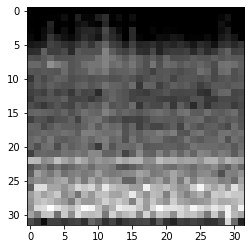

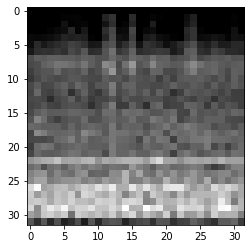

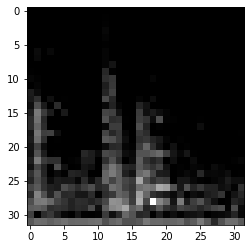

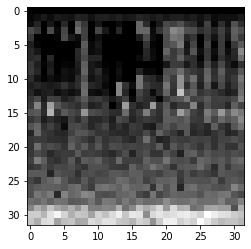

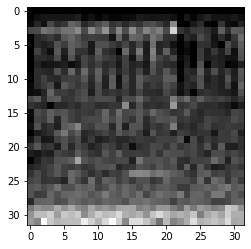

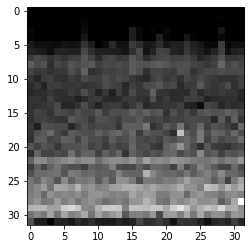

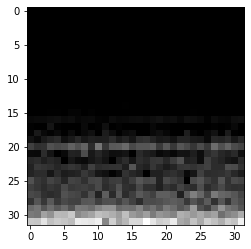

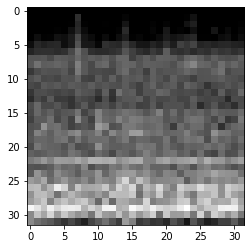

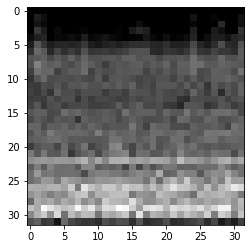

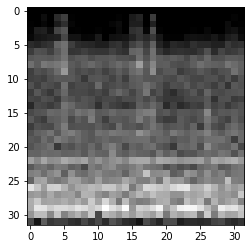

In [5]:
import matplotlib.pyplot as plt
range=0
for image,i in images:
  range+=1
  plt.imshow(image,cmap="gray")
  plt.show()
  if range==10:
    break

In [7]:
X = []
y = []

for image, idx in images:
  X.append(image)
  y.append(idx)

X = np.array(X)
y = np.array(y)


In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [9]:

folder_name="spectrograms_train_files"
os.chdir("/content/drive/MyDrive")
try:
  os.mkdir(folder_name)
except:
  print(f"{folder_name} klasörü mevcut")
  os.chdir(folder_name)
else:
  os.chdir(folder_name)
  


with open("X_train.npy", "wb") as f:
  np.save(f,X_train)


with open("y_train.npy","wb") as f:
  np.save(f,y_train)

with open("X_test.npy","wb") as f:
  np.save(f,X_test)

with open("y_test.npy","wb") as f:
  np.save(f,y_test)

with open("X_val.npy","wb") as f:
  np.save(f,X_val)

with open("y_val.npy","wb") as f:
  np.save(f,y_val)